# Some Financial Stuff in Python 

### This was a series of tutorials by Sentdex. Click [here] for the original videos.

In [66]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
from  mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

### Extract the data from the stock to a dataframe

In [47]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,9,18)
df = web.DataReader('TSLA', 'yahoo', start)

In [48]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-12,292.500000,278.649994,281.440002,290.540009,10015400,290.540009
2018-09-13,295.000000,285.179993,288.019989,289.459991,6340300,289.459991
2018-09-14,297.329987,286.519989,288.760010,295.200012,6765600,295.200012
2018-09-17,300.869995,288.130005,290.040009,294.839996,6871200,294.839996
2018-09-18,302.640015,275.500000,296.690002,284.980011,15725256,284.980011


### Transforming the data to a CSV for simplicity 

In [49]:
df.to_csv('tsla.csv')

In [50]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col=0)

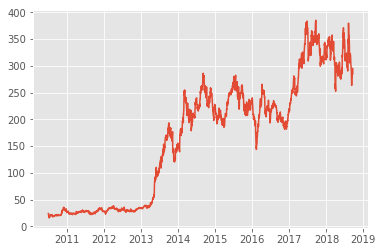

In [51]:
plt.plot(df['Adj Close'])
plt.show()

### Calculate the Moving Average(MA) of the last 100 days

In [52]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True) #To drop all the NA's

In [53]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


### Ploting the Adj. Close, MA and Volume into a single graph

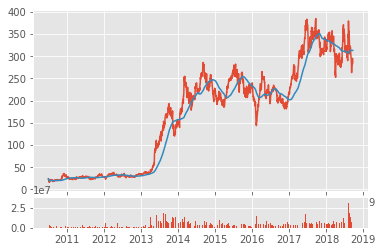

In [54]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

### Now let's make a beautiful candlestick graph

In [55]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [56]:
df_volume = df['Volume'].resample('10D').sum()

In [57]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


### Transform the dates to this crazy nonsense Matplotlib format

In [58]:
df_ohlc.reset_index(inplace=True)

In [59]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [60]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


### Then graph it

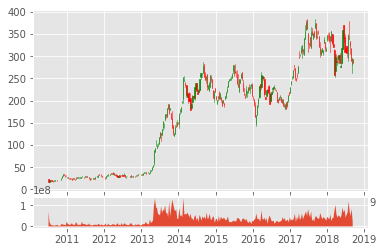

In [69]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()